# Quickstart

After installing `lambeq` you can quickly check if everything went OK by using the {ref}`command-line interface <sec-cli>`. Run the following command in a terminal:

```bash
$ lambeq "John gave Mary a flower"
```

The first time you run `lambeq`, it will need a few minutes to download {term}`Bobcat`'s statistical model. After this you should see in the terminal the {term}`pregroup <pregroup grammar>` diagram for the given sentence:

```bash
John       gave      Mary    a    flower                                                          
────  ─────────────  ────  ─────  ──────
 n    n.r·s·n.l·n.l   n    n·n.l    n
 ╰─────╯  │  │   ╰────╯    │  ╰─────╯
          │  ╰─────────────╯
```

You are now ready for some real `lambeq` coding! Let's see how the above result can be achieved programmatically. Open your Python interpreter or a Jupyter notebook and type the following:

In [2]:
from lambeq import BobcatParser

Let's create a new {term}`parser` object that we'll use to get the pregroup diagram of the sentence.

In [ ]:
parser = BobcatParser()
diagram = parser.sentence2diagram("John gave Mary a flower")

You can display the diagram by using its {py:meth}`~lambeq.backend.grammar.Diagram.draw` method.

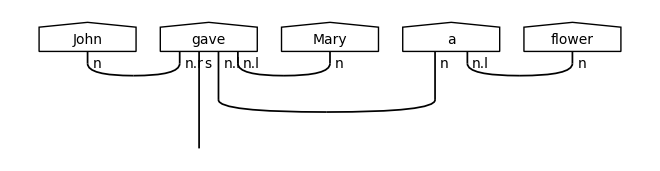

In [4]:
diagram.draw()

To use the above diagram on a quantum computer, we need to first convert it into a {term}`quantum circuit`. This can be done with the help of an {term}`ansatz <ansatz (plural: ansätze)>`. 

In [5]:
from lambeq import IQPAnsatz, AtomicType

For this example we will use an ansatz that generates an {term}`IQP circuit`. You can think ansatze as mappings from {term}`string diagrams <string diagram>` to quantum circuits. For this mapping to work, we need to provide the number of actual qubits we want to use for each wire. For example, in the above diagram note that each wire is annotated with a type, `n` representing nouns and `s` the entire sentence; so, to create the ansatz, we pass a dictionary from noun and sentence types to a specified number of qubits. We also have to provide the number of IQP layers we want for the circuit, as well as the number of rotations that will represent each qubit.

In [ ]:
mapping = { AtomicType.NOUN: 1, AtomicType.SENTENCE: 1 }
ansatz = IQPAnsatz(mapping, n_layers=1, n_single_qubit_params=3)

Getting the circuit now is just a matter of applying the ansatz to the string diagram.

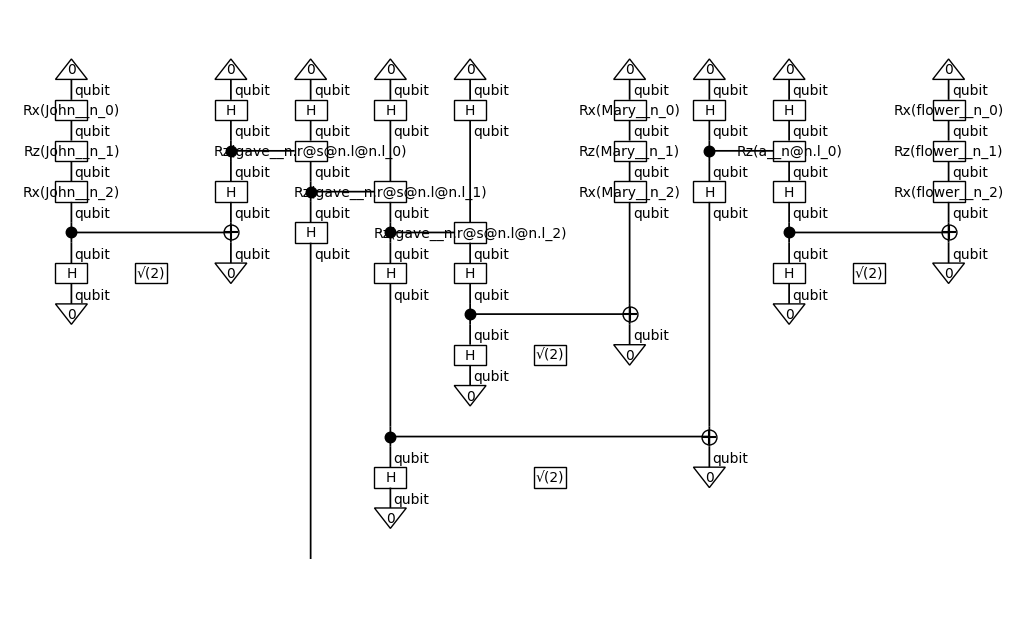

In [8]:
circuit = ansatz(diagram)
circuit.draw(figsize=(10,6))

Congratulations on creating your first quantum circuit from natural language text! You are now ready to try some more detailed tutorials, check the links below for suggestions.

```{rubric} See also:
```

- {ref}`From sentence to circuit <sec-sent2circ>`
- {ref}`From text (paragraph-level) to circuit <sec-text2circ>`